# Árbol de Decisión — Overfitting vs Good Fit vs Underfitting

**Dataset**: *Banknote Authentication* (binario: 0=auténtico, 1=falso).

- Kaggle (referencia): Bank Note Authentication UCI data. "https://www.kaggle.com/datasets/ritesaluja/bank-note-authentication-uci-data"
- UCI (descarga directa en el código): *Banknote Authentication Data Set*.

**Objetivo didáctico**: entrenar **tres árboles** con distinta complejidad y comparar:
1) **Overfitting** (árbol muy profundo)
2) **Good fit** (profundidad moderada)
3) **Underfitting** (árbol muy poco profundo)

Al final, **escribe tus observaciones** y di **cuál elegirías y por qué**.

Recursos de apoyo: https://4geeks.com/es/lesson/arboles-de-decision
https://scikit-learn.org/stable/auto_examples/tree/plot_cost_complexity_pruning.html

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix


## 1) Cargar dataset y quedarnos con 2 features
Usaremos **variance** y **skewness** para poder dibujar regiones de decisión fácilmente.

In [4]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00267/data_banknote_authentication.txt'
cols = ['variance','skewness','curtosis','entropy','target']
df = pd.read_csv(url, header=None, names=cols)

X = df[['variance','skewness']].values
y = df['target'].values
df.head()

,variance,skewness,curtosis,entropy,target
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


## 2) División train/test

In [5]:
RANDOM_STATE = 42
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=RANDOM_STATE, stratify=y
)
X_train.shape, X_test.shape

((1029, 2), (343, 2))

## 3) Función para dibujar regiones de decisión

In [6]:
def plot_decision_regions(X, y, clf, title='Decision regions'):
    x_min, x_max = X[:,0].min() - 1.0, X[:,0].max() + 1.0
    y_min, y_max = X[:,1].min() - 1.0, X[:,1].max() + 1.0
    xx, yy = np.meshgrid(
        np.linspace(x_min, x_max, 400),
        np.linspace(y_min, y_max, 400)
    )
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.figure(figsize=(5,4))
    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X[:,0], X[:,1], c=y, s=25)
    plt.title(title)
    plt.xlabel('variance')
    plt.ylabel('skewness')
    plt.tight_layout()
    plt.show()


## 4) Entrenar tres árboles con distinta complejidad

### 4.1 Overfitting (árbol sobreajustado)

Accuracy train: 1.0
Accuracy test : 0.918
Confusion matrix (test):
 [[175  16]
 [ 12 140]]


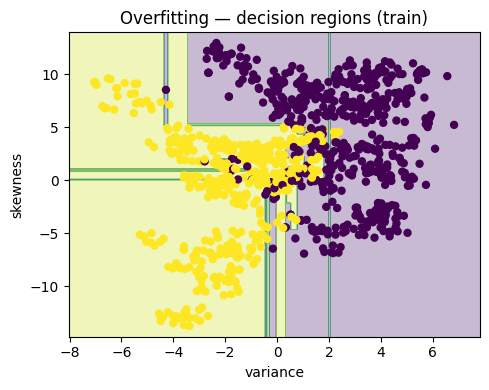

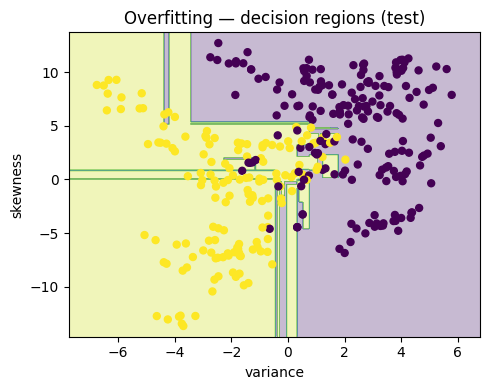

In [7]:
over = DecisionTreeClassifier(random_state=RANDOM_STATE, max_depth=None, min_samples_leaf=1)
over.fit(X_train, y_train)
y_pred_tr = over.predict(X_train)
y_pred_te = over.predict(X_test)
acc_tr = accuracy_score(y_train, y_pred_tr)
acc_te = accuracy_score(y_test, y_pred_te)
cm_over = confusion_matrix(y_test, y_pred_te)
print('Accuracy train:', round(acc_tr,3))
print('Accuracy test :', round(acc_te,3))
print('Confusion matrix (test):\n', cm_over)
plot_decision_regions(X_train, y_train, over, title='Overfitting — decision regions (train)')
plot_decision_regions(X_test, y_test, over, title='Overfitting — decision regions (test)')


### 4.2 Good fit (profundidad moderada)

Accuracy train: 0.931
Accuracy test : 0.907
Confusion matrix (test):
 [[170  21]
 [ 11 141]]


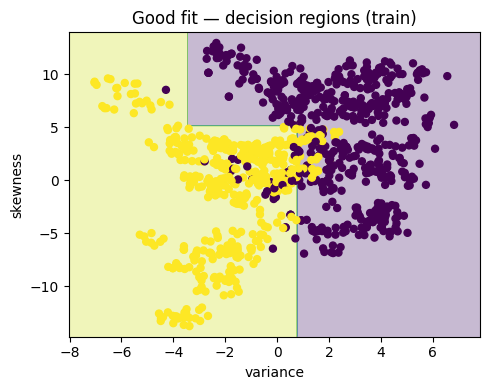

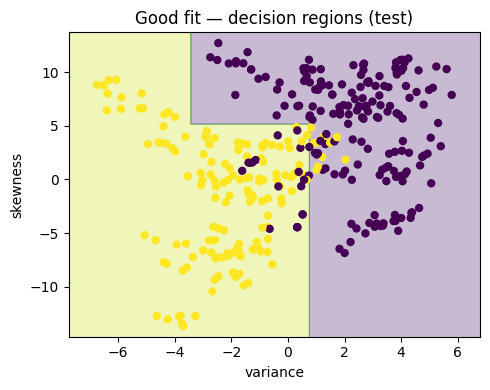

In [8]:
good = DecisionTreeClassifier(random_state=RANDOM_STATE, max_depth=3, min_samples_leaf=5)
good.fit(X_train, y_train)
y_pred_tr = good.predict(X_train)
y_pred_te = good.predict(X_test)
acc_tr = accuracy_score(y_train, y_pred_tr)
acc_te = accuracy_score(y_test, y_pred_te)
cm_good = confusion_matrix(y_test, y_pred_te)
print('Accuracy train:', round(acc_tr,3))
print('Accuracy test :', round(acc_te,3))
print('Confusion matrix (test):\n', cm_good)
plot_decision_regions(X_train, y_train, good, title='Good fit — decision regions (train)')
plot_decision_regions(X_test, y_test, good, title='Good fit — decision regions (test)')


### 4.3 Underfitting (árbol demasiado simple)

Accuracy train: 0.844
Accuracy test : 0.828
Confusion matrix (test):
 [[143  48]
 [ 11 141]]


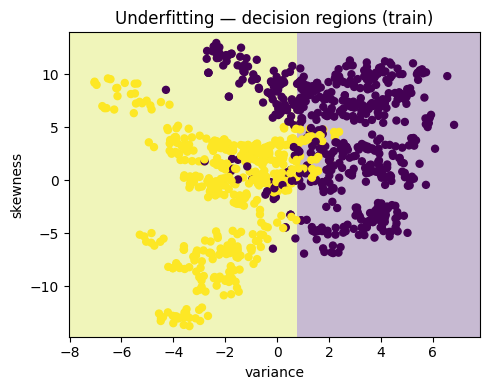

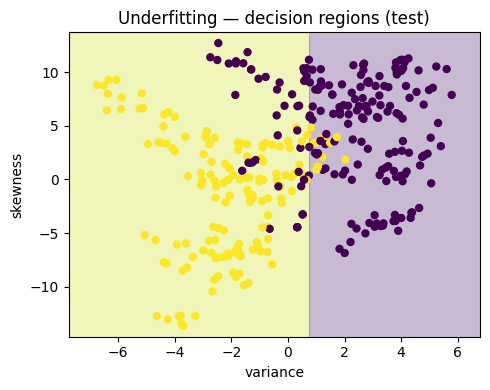

In [9]:
under = DecisionTreeClassifier(random_state=RANDOM_STATE, max_depth=1)
under.fit(X_train, y_train)
y_pred_tr = under.predict(X_train)
y_pred_te = under.predict(X_test)
acc_tr = accuracy_score(y_train, y_pred_tr)
acc_te = accuracy_score(y_test, y_pred_te)
cm_under = confusion_matrix(y_test, y_pred_te)
print('Accuracy train:', round(acc_tr,3))
print('Accuracy test :', round(acc_te,3))
print('Confusion matrix (test):\n', cm_under)
plot_decision_regions(X_train, y_train, under, title='Underfitting — decision regions (train)')
plot_decision_regions(X_test, y_test, under, title='Underfitting — decision regions (test)')


## 5) Conclusión — Recuadro para tus observaciones
- **Overfitting**: ¿qué observas en entrenamiento vs test?
- **Good fit**: ¿cómo se comparan las fronteras de decisión entre clases? ¿y las métricas?
- **Underfitting**: ¿qué patrón ves? ¿qué está pasando con la frontera?

**¿Cuál es el mejor y por qué?**

> En el caso de overfitting podemos ver que en el entrenamiento consigue accuracy 1 (perfecto)
pero luego en la evaluación vemos que decrece la precisión lo que dará lugar a falsos positivos

> En el caso del ajuste correcto vemos que el entranemiento es un poco menos preciso, pero
es más parejo al accuracy del training set, lo que hará que el modelo funcione mejor con casos
fuera del dataset

> En el caso del underfitting se ve claramente como, al solo hacer una división, muchos de los casos
están erroneamente clasificados, y la precisión es demasiado baja como para poder considerar este modelo
como usable

> En mi opinión el mejor modelo es el 2o, el que tiene max_depth=3, porque hace la partición más limpia 
pero que más precisión tiene de los datos, y funcionará mejor con datos del mundo real 